In [1]:
import dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import cv2

In [4]:
data = dataset.LoadFDDB(
    'D:\\Github\\pppFaceDetection\\dataset\\300w\\300w_train.txt',
    'D:\\Github\\pppFaceDetection\\dataset\\300w\\images')

In [12]:
axis0 = []
axis1 = []
angle = []

for d in data:
    img = cv2.imread(d[0])
    max_dim = max(img.shape[0], img.shape[1])
    
    for el in d[1]:
        axis0.append(el[0] / max_dim)
        axis1.append(el[1] / max_dim)
        angle.append(180.0 / 3.14 * el[2])

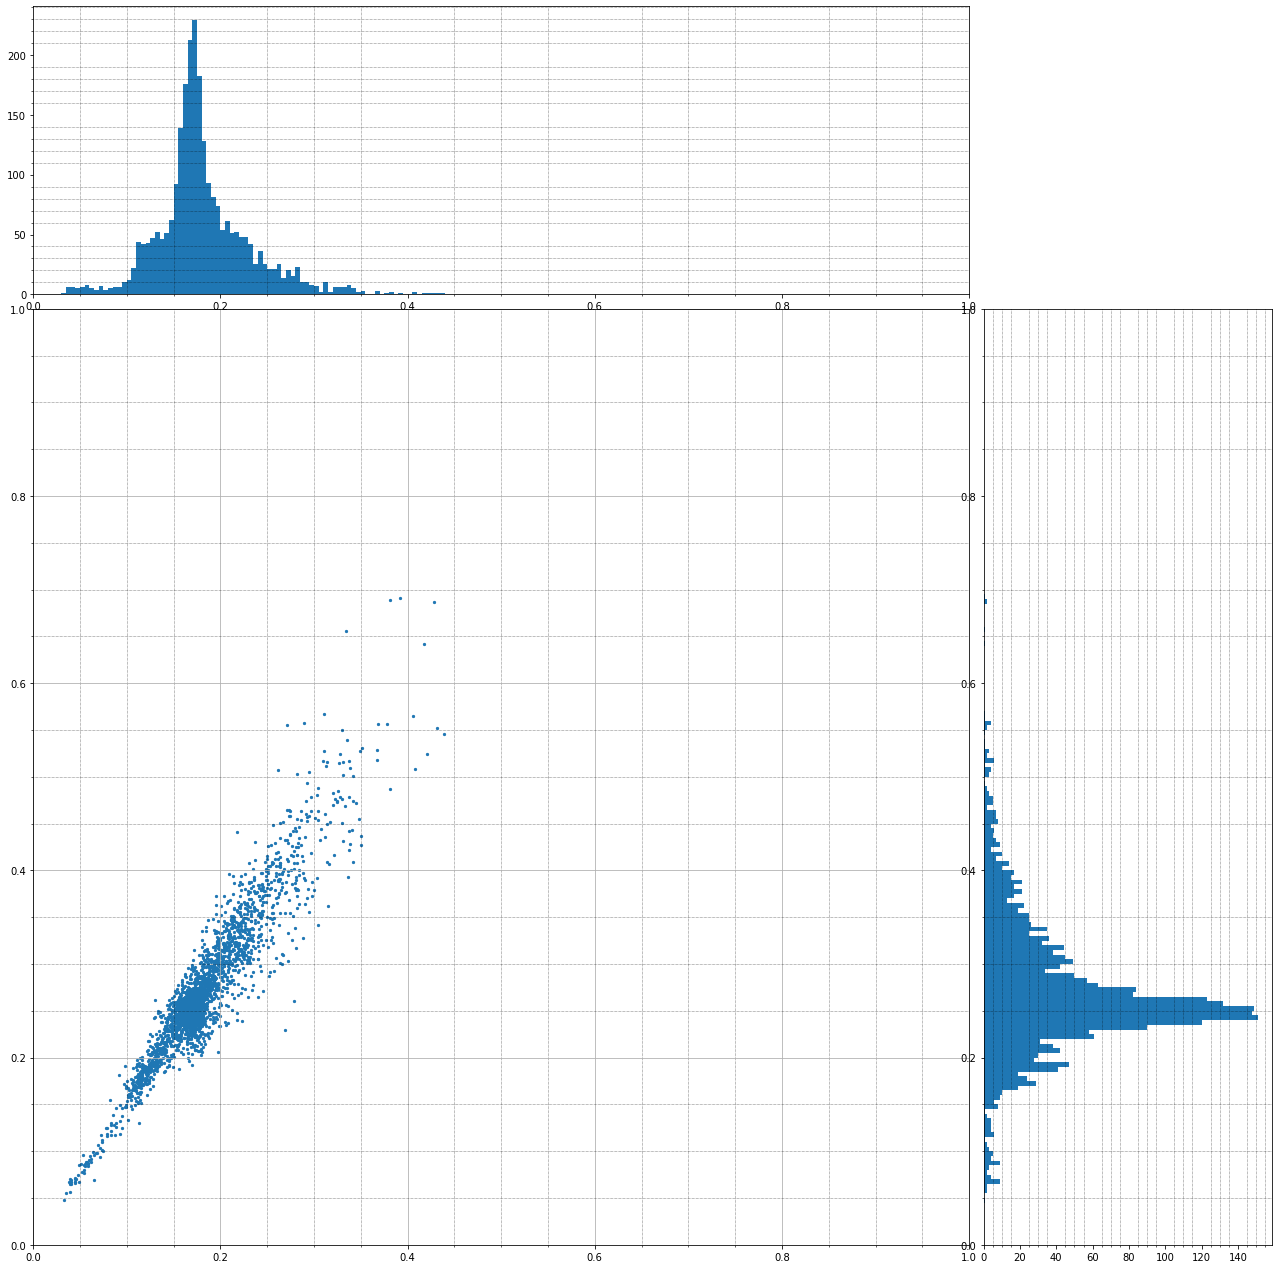

In [7]:
plt.figure(figsize=(20, 20))

left, bottom, width, height, spacing = 0.1, 0.1, 0.65, 0.65, 0.01

ax_scatter = plt.axes([left, bottom, width, height])
ax_histx = plt.axes([left, bottom + height + spacing, width, 0.2])
ax_histy = plt.axes([left + width + spacing, bottom, 0.2, height])

# scatter
ax_scatter.scatter(axis0, axis1, s=5)
ax_scatter.grid(True)
ax_scatter.minorticks_on()
ax_scatter.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax_scatter.yaxis.label.set_size(1000)

# now determine nice limits by hand:
binwidth = 0.1
axis0_max = np.ceil(np.max(axis0))
axis0_min = np.floor(np.min(axis0))
axis1_max = np.ceil(np.max(axis1))
axis1_min = np.floor(np.min(axis1))

ax_scatter.set_xlim((axis0_min, axis0_max))
ax_scatter.set_ylim((axis1_min, axis1_max))

x_bins = np.arange(axis0_min, axis0_max, 0.005)
y_bins = np.arange(axis1_min, axis1_max, 0.005)
ax_histx.hist(axis0, bins=x_bins)
ax_histy.hist(axis1, bins=y_bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_histx.minorticks_on()
ax_histy.minorticks_on()

ax_histx.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax_histy.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.savefig("d:/figplot.png")
plt.show()

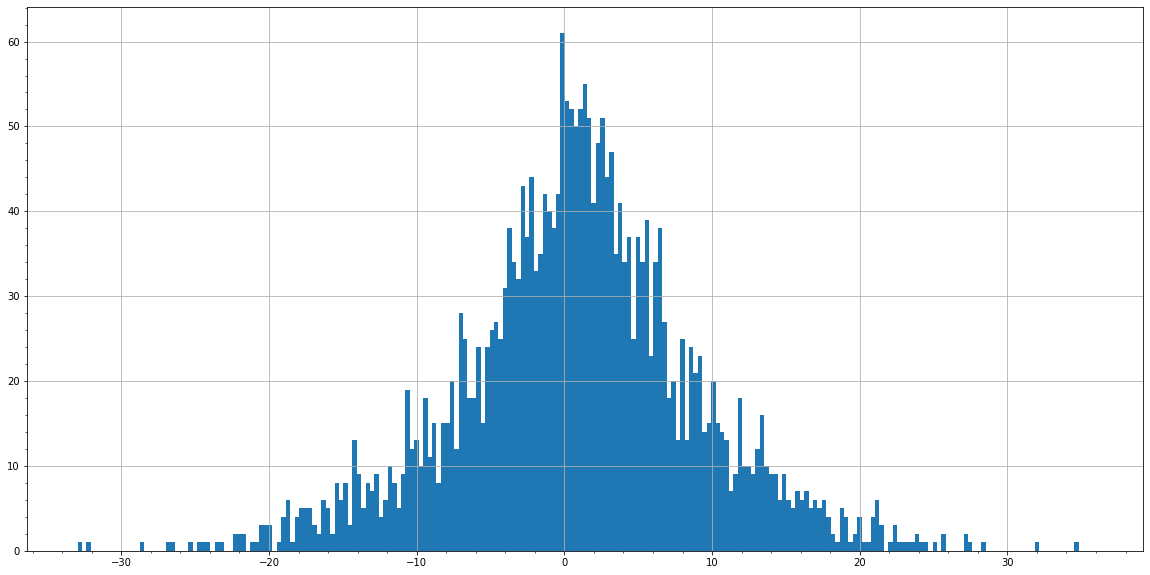

In [15]:
plt.figure(figsize=(20, 10))

angle_min = np.min(angle)
angle_max = np.max(angle)
angle_bin = np.arange(angle_min, angle_max, 0.3)

plt.hist(angle, bins=angle_bin)
plt.grid(True)
plt.minorticks_on()

plt.savefig("d:/figplot2.png")
plt.show()